In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import h5py
import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

In [3]:

# Base directory
base_dir = os.getcwd()

data_raw_where = base_dir + '/data/' # where the raw data(before sampling) were stored
data_sampled_where = base_dir + '/data/data_sampled/' # where the sampled data were stored
weights_path = base_dir + '/weights/' # where the weights were stored
predict_where = base_dir + '/one_class_SVM_predict/' # Where to save predictions
umap_where = base_dir + '/umap_plots/' # where to save umap plots
confusion_where = base_dir + '/confusion_matrix/' # where to save confusion matrices 
accuracy_where = base_dir + '/accuracy' # where to save accuracy (plots Recall(nu), Precision(nu), F1(nu))



#angus_labels = np.genfromtxt('run210label.csv',delimiter=',',dtype=int) 
#angus_labels = np.delete(angus_labels , 1, axis = 1)

sample_size = 512 # sample size = num_points in PointNet model
#h5data = 'with_tresh' # do not delete events with less than 5 points,just in case you want to 
                        #check what will happen in this case, with my data it didn't                           #bring any benefit

h5data = '512_sampled' # choose the sample size (to be more precise, you only need to do it when
                       # you wanna make some 3D plots)

#h5data = '128_sampled'

#eval_type = 'less'
#eval_t = 'angus'
eval_t = 'less' # This means that to evaluate our results, we use the approach 
                #in which fission events are events that have more than or equal to 100 points. 
                #This is a rough approach, but it allows us to understand how close our results
                #are to the desired ones.
    
    
if h5data == 'with_tresh':
    ind_for_my = np.load(data_raw_where + 'index_for_tresh_sampled_my.npy')
    ind_for_angus = np.load(data_raw_where + 'index_for_tresh_sampled_angus.npy')
    
    ind_n_my = ind_for_my[:,0]
    ind_n_angus = ind_for_angus[:,0]
    
    data_raw1 = np.load(data_raw_where + 'data_with_tresh_sampled.npy')
    data = np.delete(data_raw1, (3,4,5,6), axis = 2)
    
    more = np.zeros((ind_for_angus.shape[0],2))
    count = 0
    for i in ind_n_angus:
        more[count] = angus_labels[int(i)]
        count += 1
    more_than_100 = more[:,0]


elif h5data == '512_sampled':
    data_raw1 = np.load(data_sampled_where + '512_sampled_old.npy')
    if eval_t == 'less':
       
        more_than_100 = np.zeros((data_raw1.shape[0],))
        for i in range(data_raw1.shape[0]):
            if data_raw1[i,0,4] >= 100:
                more_than_100[i] = 1
            else:
                more_than_100[i] = 0
                
    elif eval_t == 'angus':
        ind_for_my = np.load(data_raw_where+'index_for_5_sampled_my.npy')
        ind_for_angus = np.load(data_raw_where+'index_for_5_sampled_angus.npy')
    
        ind_n_my = ind_for_my[:,0]
        ind_n_angus = ind_for_angus[:,0]
    
        more = np.zeros((ind_for_angus.shape[0],2))
        count = 0
        for i in ind_n_angus:
            more[count] = angus_labels[int(i)]
            count += 1
        more_than_100 = more[:,1]
elif h5data == '128_sampled':
    data_raw1 = np.load(data_sampled_where + '128_sampled_old.npy')
    if eval_t == 'less':
        more_than_100 = np.zeros((data_raw1.shape[0],))
        for i in range(data_raw1.shape[0]):
            if data_raw1[i,0,4] >= 100:
                more_than_100[i] = 1
            else:
                more_than_100[i] = 0
more_than_100 = np.reshape(more_than_100, (more_than_100.shape[0],))
more_than_100 = more_than_100 == 1


#fission = data[more_than_100]
#not_fission = data[less_than_100]


/home/DAVIDSON/dmkurdydyk/.conda/envs/aot/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


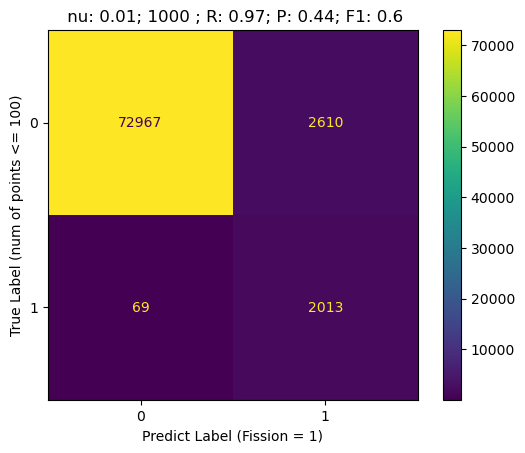

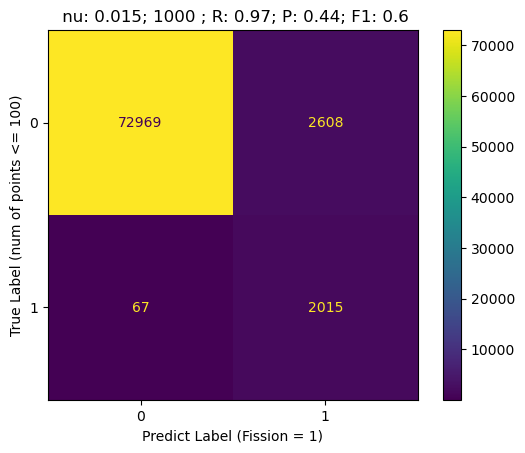

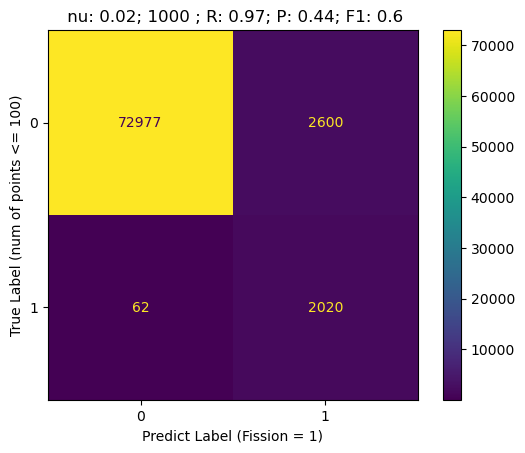

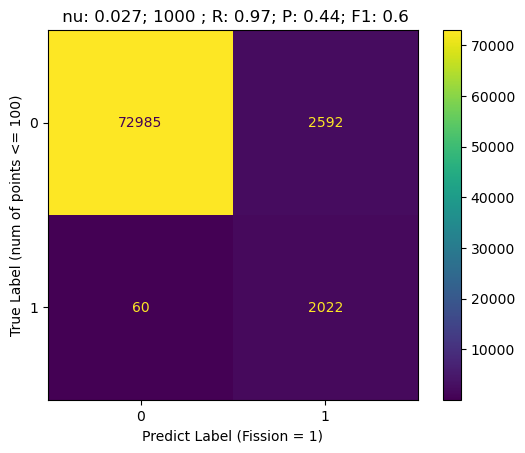

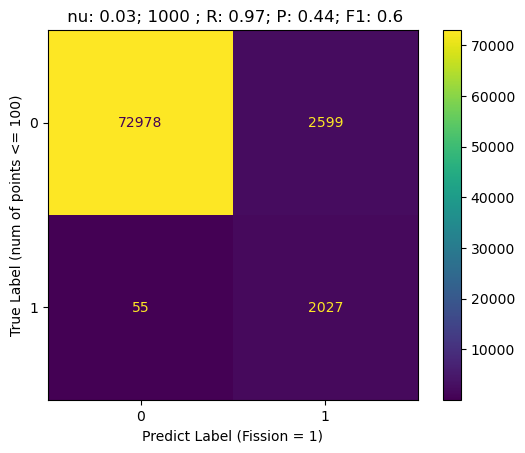

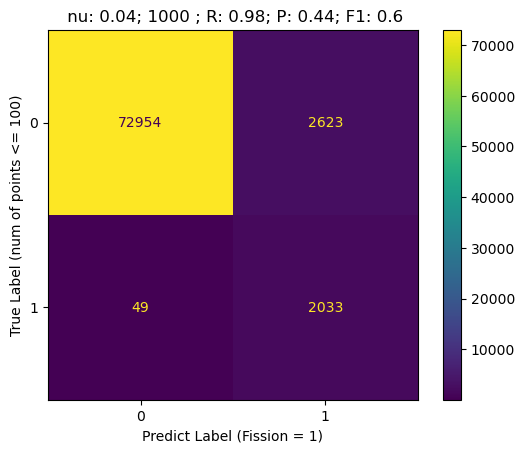

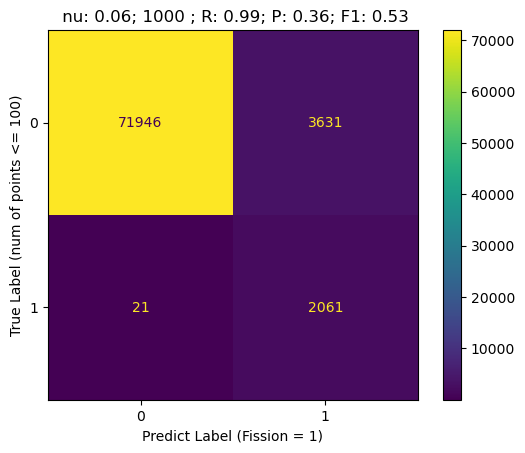

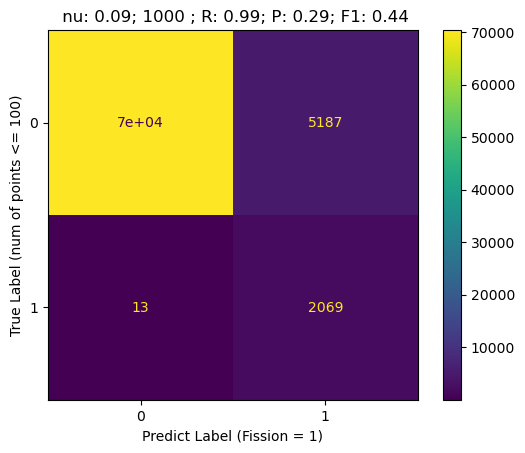

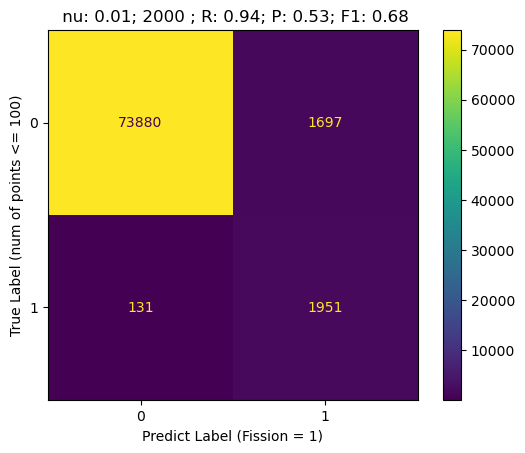

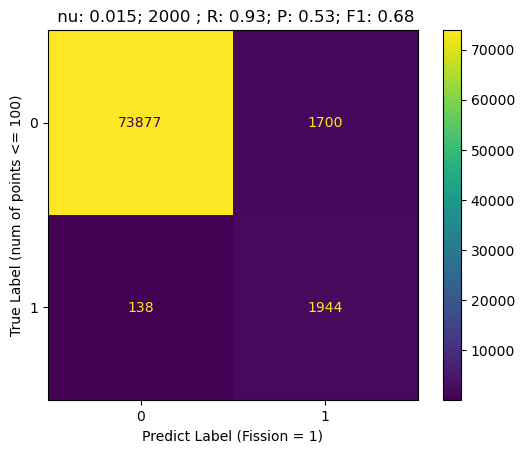

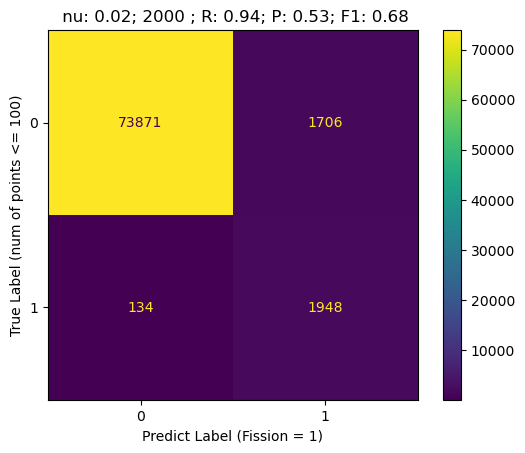

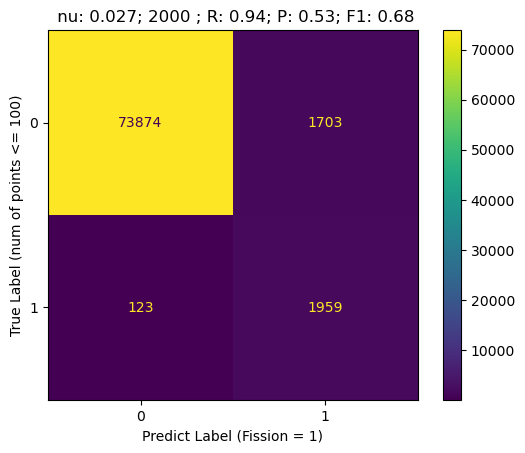

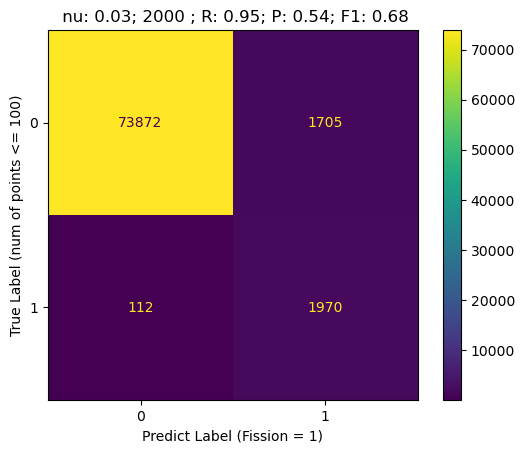

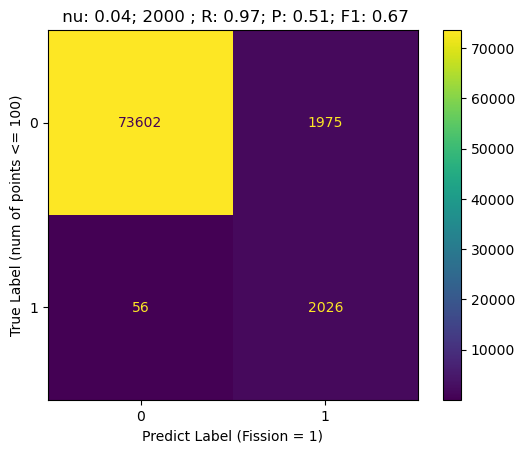

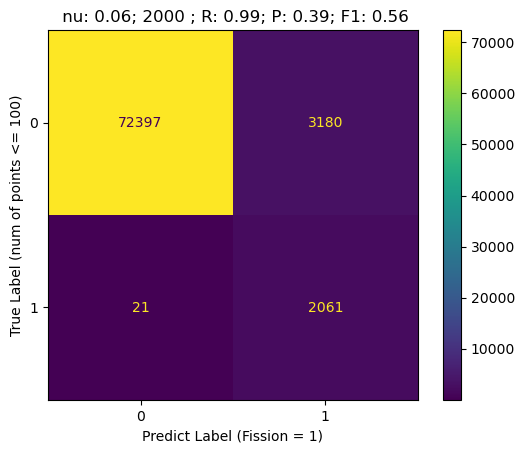

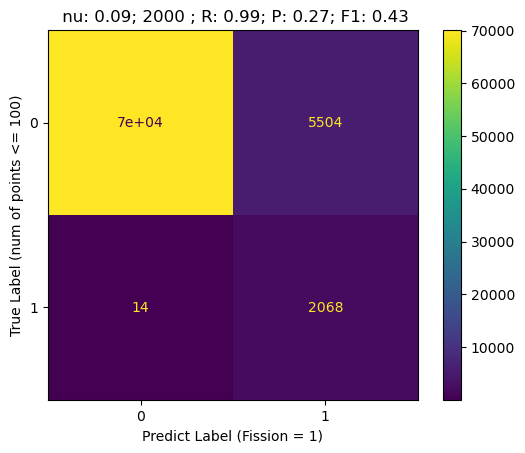

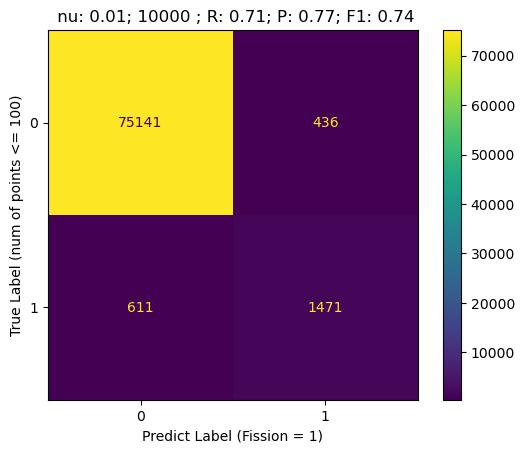

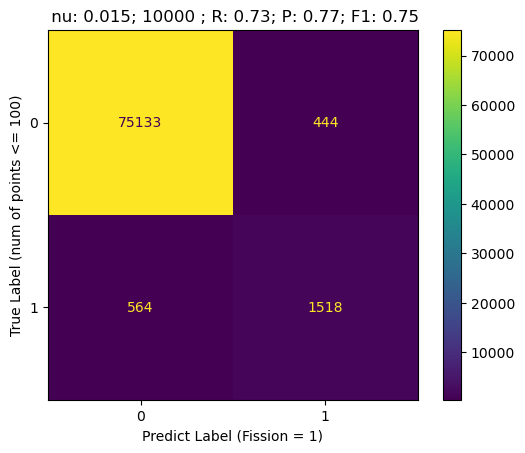

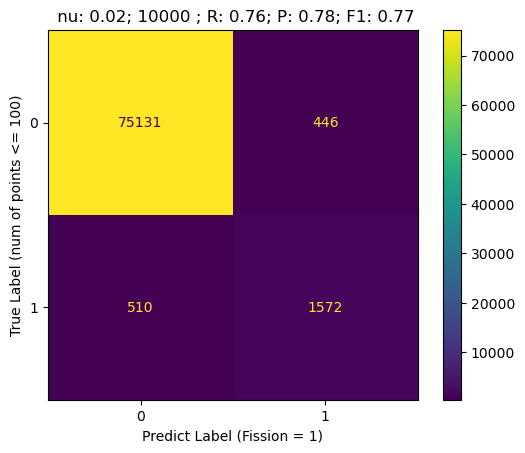

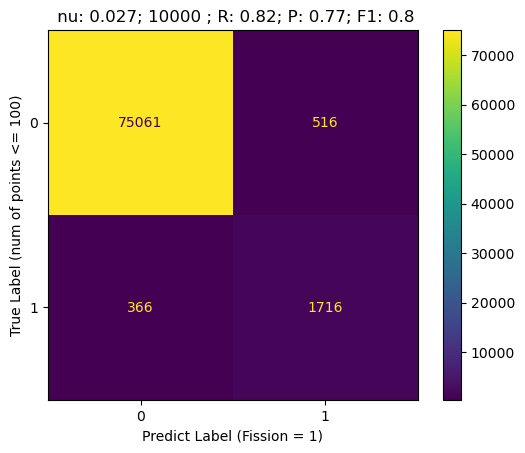

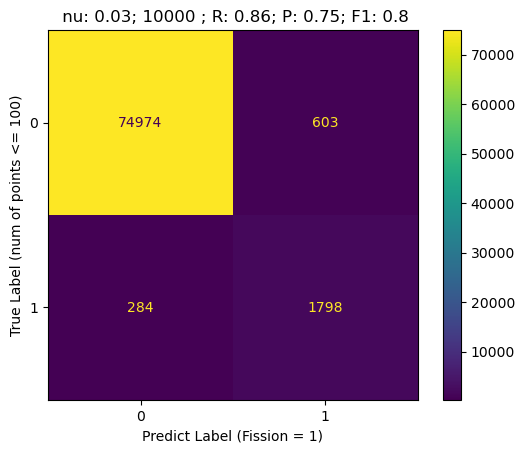

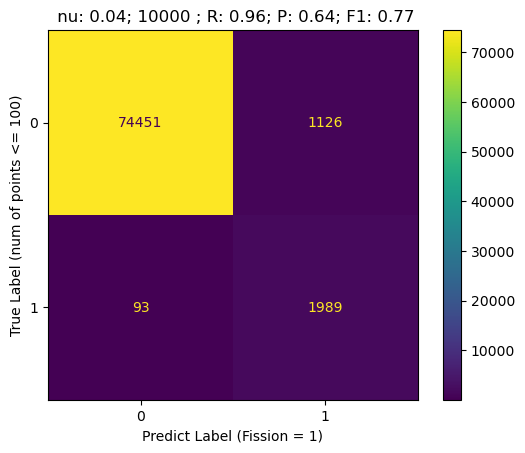

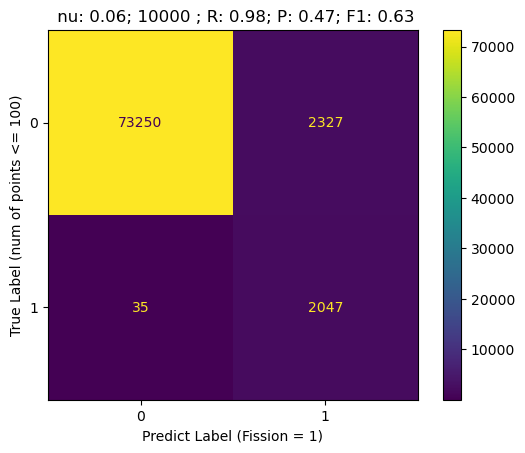

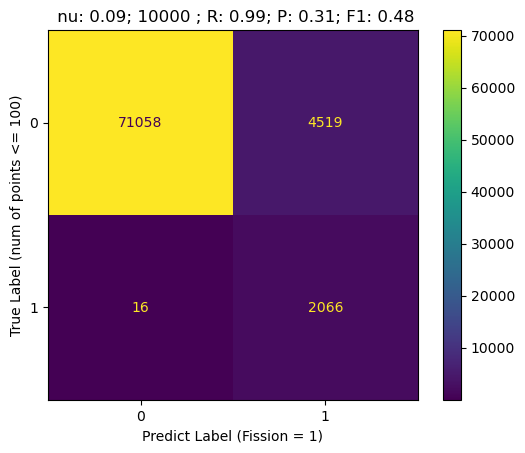

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score
from sklearn.metrics import recall_score

nu1 = np.array([0.01, 0.015, 0.02, 0.027, 0.03, 0.04, 0.06, 0.09])
num_of_train_ex1 = np.array([1000,2000,10000])
kernel = 'rbf'
gamma = 'auto'
#gamma = 'scale'
#gamma = 0.00001
nrand = 3
#shuffle = 'random'
#shuffle = 'no shuffle'
#data_type = 'without_charge' # for Mg22 weights, sample = 512, latent = 1024, X,Y,Charge
#data_type = 'without_charge_random' # for Random Weights, sample = 512, latent = 1024, X,Y,Charge
#data_type = 'Mg22_without_charge_y' # Mg22 weights, sample = 512, latent = 1024, X, Charge
#data_type = 'Mg22_without_charge_x' # Mg22 weights, sample = 512, latent = 1024, Y, Charge
#data_type = 'Chair_without_charge' 
#data_type = 'Chair_without_charge_x'
#data_type = 'Chair_without_charge_y'
#data_type = 'Chair_without_charge_z'
#data_type = 'chair_2_without_charge'
#data_type = 'chair_2_without_charge_x'
#data_type = 'chair_2_without_charge_y'
#data_type = 'chair_2_without_charge_z'
#data_type = 'dresser_chair_without_charge'
#data_type = 'sofa_table_without_charge'
#data_type = 'dresser_chair_without_charge_x
#data_type = 'dresser_chair_without_charge_1024'
#data_type = 'dresser_chair_without_charge_1024_16'
#data_type = 'dresser_chair_without_charge_1024_1'
#data_type = 'dresser_chair_without_charge_512_16'
#data_type = 'dresser_chair_without_charge_512_8'
#data_type = 'dresser_chair_without_charge_512_1'
#data_type = 'dresser_chair_512_512' # sample size = 512, latent space size = 512, X,Y,Charge
#data_type = 'dresser_chair_512_2048' # sample size = 512, latent space size = 2048, X,Y,Charge
#data_type = 'dresser_chair_512_1024' # sample size = 512, latent space size = 1024, X,Y,Charge
#data_type = 'dresser_chair_512_1024_x' # sample size = 512, latent space size = 1024, Y,Z,Charge
#data_type = 'dresser_chair_512_1024_y' # sample size = 512, latent space size = 1024, X,Z,Charge
#data_type = 'dresser_chair_512_1024_n' # sample size = 512, latent space size = 1024, X,Y,num_points
#data_type = 'dresser_chair_512_1024_ncx' # sample size = 512, latent space size = 1024, X,points,Charge
#data_type = 'dresser_chair_512_1024_ncz' # sample size = 512, latent space size = 1024, Z,points,Charge
#data_type = 'dresser_chair_128_1024'# sample size = 128, latent space size = 1024, X,Y,Charge
data_type = 'dresser_chair_without_charge_256_1024' # sample size = 256, latent space size = 1024, X,Y,Charge
#data_type = 'dresser_chair_64_1024' # sample size = 64, latent space size = 1024, X,Y,Charge
#data_type = 'dresser_chair_32_1024' # sample size = 32, latent space size = 1024, X,Y,Charge
# data_type = 'dresser_chair_16_1024' # sample size = 16, latent space size = 1024, X,Y,Charge
#data_type = 'dresser_chair_375_1' # sample size = 375, latent space size = 1024, X,Y,Charge
#data_type = 'dresser_chair_512_1_512' # sample size = 512, latent space size = 1024, X,Y,Charge
#data_type = 'dresser_chair_512_1_2048'
#data_type = 'dresser_chair_without_charge_2_512_1'
#data_type = 'dresser_chair_without_charge_2048_32'
#data_type = 'dresser_chair_without_charge_512'
# data_type = 'dresser_chair_without_charge_256'
#data_type = 'dresser_chair_without_charge_512_big'
#data_type = 'dresser_chair_without_charge_512_big_2'
#data_type = 'dresser_chair_without_charge'
#data_type = 'dresser_chair_without_charge_z_512_1'
#data_type = 'chair_6'
#data_type = 'dresser_chair_512_1_30'
#data_type = 'Mg22_without_charge_z'
#data_type = 'sofa_table_without_charge_512_1'
#num_of_train_ex = 77659

data = data_raw1
num_of_predict = data.shape[0]

for j in num_of_train_ex1:
    for i in nu1:
        if data_type == 'shuffle':
            predict = np.load(predict_where + 'Shuffle_predict_4' + 'train_predict_' +
                str(j) + '_' 
                + str(num_of_predict) + 
                '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
    
        elif data_type == 'random':
            predict = np.load(predict_where + 'Random_weights_nrand' + str(nrand) +
                '_Shuffle_' + 'train_predict_' + 
                str(j) + '_' 
                + str(num_of_predict) + 
                '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
    
        elif data_type == 'without_charge':
            predict = np.load(predict_where + 'Mg22_weights_without_charge' +'_Shuffle_' +
                'train_predict_' +   str(j) + '_' 
                + str(num_of_predict) + 
                '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
            
        elif data_type == 'without_charge_random':
            predict = np.load(predict_where + 'Random_weights_without_charge_nrand' + str(nrand) +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'Mg22_without_charge_y':
            predict = np.load(predict_where + 'Random_weights_without_charge_y_nrand' + str(nrand) +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'Mg22_without_charge_x':
            predict = np.load(predict_where + 'Mg22_weights_without_charge_x' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'Mg22_without_charge_z':
            predict = np.load(predict_where + 'Mg22_weights_without_charge_z' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'Chair_without_charge':
            predict = np.load(predict_where + 'Chair_weights_without_charge' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'Chair_without_charge_x':
            predict = np.load(predict_where + 'Chair_weights_without_charge_x' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'Chair_without_charge_y':
            predict = np.load(predict_where + 'Chair_weights_without_charge_y' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'Chair_without_charge_z':
            predict = np.load(predict_where + 'Chair_weights_without_charge_z' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'chair_2_without_charge':
            predict = np.load(predict_where + 'Chair_weights_without_charge_2' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'chair_2_without_charge_x':
            predict = np.load(predict_where + 'Chair_weights_without_charge_x_2' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'chair_2_without_charge_y':
            predict = np.load(predict_where + 'Chair_weights_without_charge_y_2' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'chair_2_without_charge_z':
            predict = np.load(predict_where + 'Chair_weights_without_charge_z_2' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'sofa_table_without_charge':
            predict = np.load(predict_where + 'sofa_table_weights_without_charge' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_x':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_x' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_1024':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_1024' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_512':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_512' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_256_1024':
            predict = np.load(predict_where + 'dresser_chair_without_charge_256_1024' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_512_big':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_512_big' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_512_big_2':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_512_big_2' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_512_16':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_512_16' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_2048_32':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_2048_32' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_512_8':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_512_8' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_512_1':
                predict = np.load(predict_where + 'dresser_chair_weights_without_charge_512_1' 
                                  +'_Shuffle_' +
                                  'train_predict_' +   str(j) + '_' 
                                 + str(num_of_predict) + 
                                 '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + 
                                  '_nu_' + str(i) + '.npy')
                if eval_t == 'angus':
                    abcd = np.zeros((ind_n_my.shape[0]))
                    count = 0
                    for x in ind_n_my:
                        abcd[count] = predict[x]
                        count += 1  
        elif data_type == 'dresser_chair_without_charge_1024_16':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_1024_16' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_1024_1':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_1024_1' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_2_512_1':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_2_512_1' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'sofa_table_without_charge_512_1':
            predict = np.load(predict_where + 'sofa_table_without_charge_512_1' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_without_charge_z_512_1':
            predict = np.load(predict_where + 'dresser_chair_weights_without_charge_z_512_1' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'chair_6':
            predict = np.load(predict_where + 'chair_6_without_charge_512_1' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1_30':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1_30' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_375_1':
            predict = np.load(predict_where + 'dresser_chair_without_charge_375_1' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1_512':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1_512' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1_2048':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1_2048' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'with_n_512':
            predict = np.load(predict_where + 'with_n_dresser_chair_weights_without_charge_512_1' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'data_250':
            predict = np.load(predict_where + '250_dresser_chair_weights_without_charge_512_1' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_512':
            if h5data == 'without_tresh':
                predict = np.load(predict_where + 'dresser_chair_without_charge_512_1_512'
                                  +'_Shuffle_' +
                                    'train_predict_' +   str(j) + '_' 
                                    + str(num_of_predict) + 
                                    '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' +
                                      str(i) + '.npy')
            elif h5data == '512_sampled':
                predict = np.load(predict_where + '5_dresser_chair_without_charge_512_1_512'
                                  +'_Shuffle_' +
                                    'train_predict_' +   str(j) + '_' 
                                    + str(num_of_predict) + 
                                    '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' +
                                      str(i) + '.npy')
        elif data_type == 'dresser_chair_512_2048':
            if h5data == '512_sampled':
                predict = np.load(predict_where + 'dresser_chair_without_charge_512_1_2048' +
                                  '_Shuffle_' +
                                  'train_predict_' +   str(j) + '_' 
                                    + str(num_of_predict) + 
                                    '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + 
                                   '_nu_' + str(i) + '.npy')
            elif h5data == 'without_tresh':
                predict = np.load(predict_where + 'old_dresser_chair_without_charge_512_1_2048' +
                                  '_Shuffle_' +
                                  'train_predict_' +   str(j) + '_' 
                                    + str(num_of_predict) + 
                                    '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + 
                                   '_nu_' + str(i) + '.npy')
                
        elif data_type == 'dresser_chair_64_1024':
                predict = np.load(predict_where + 'dresser_chair_without_charge_64_1024'
                              +'_Shuffle_' +
                                'train_predict_' +   str(j) + '_' 
                                + str(num_of_predict) + 
                                '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + 
                                  '_nu_' + str(i) + '.npy')
            
                
        elif data_type == 'dresser_chair_512_1024':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1024' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_32_1024':
            predict = np.load(predict_where + 'dresser_chair_without_charge_32_1024' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_128_1024':
            predict = np.load(predict_where + 'dresser_chair_without_charge_128_1024' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1024_old':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1024_old' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1024_x':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1024_x' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1024_y':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1024_y' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1024_n':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1024_n' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1024_ncx':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1024_ncx' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_512_1024_ncz':
            predict = np.load(predict_where + 'dresser_chair_without_charge_512_1024_ncz' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_256_1024':
            predict = np.load(predict_where + 'dresser_chair_without_charge_256_1024' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')
        elif data_type == 'dresser_chair_16_1024':
            predict = np.load(predict_where + 'dresser_chair_without_charge_16_1024' +'_Shuffle_' +
            'train_predict_' +   str(j) + '_' 
            + str(num_of_predict) + 
            '_kernel_' + str(kernel) +'_gamma_'+ str(gamma) + '_nu_' + str(i) + '.npy')

        


        anom_ind = predict == -1
        
        
        anom_ind = anom_ind.T 
        
        recall = recall_score(more_than_100, anom_ind)
        precision = precision_score(more_than_100, anom_ind)
        f1_score1 = f1_score(more_than_100, anom_ind)
        accuracy_1 = np.array([[recall],
                              [precision],
                              [f1_score1],
                              [i]])
        
        conf_mat = confusion_matrix(more_than_100, anom_ind)
        conf_disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat)
        conf_disp.plot()
        plt.title( " nu: " + str(i) + '; ' + str(j) + " ; R: " + str(round(recall, 2)) +"; P: " + 
                  str(round(precision, 2)) +
                  "; F1: " + str(round(f1_score1, 2)) )
        plt.xlabel("Predict Label (Fission = 1)")
        plt.ylabel("True Label (num of points <= 100)")
        #plt.show()

    
        if data_type == 'shuffle':
            plt.savefig(confusion_where + "Shuffle_confusion_matrix_train_predict_" + str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Shuffle_accuracy_train_predict'+ '_' + str(j) + '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
    
        elif data_type == 'random':
            plt.savefig(confusion_where + "Random_weights_" +str(nrand) + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Random_weights_'+str(nrand)+'Shuffle_accuracy_train_predict'+ '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)

        elif data_type == 'without_charge':
            plt.savefig(confusion_where + "Mg22_without_charge_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Mg22_without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'without_charge_random':
            plt.savefig(confusion_where + "Random_" +str(nrand)+ "_without_charge_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Random_' + str(nrand) + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'Mg22_without_charge_y':
            plt.savefig(confusion_where + "Mg22_" + "_without_charge_y_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Mg22_'  + 'without_charge_y_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
   
        elif data_type == 'Mg22_without_charge_x':
            plt.savefig(confusion_where + "Mg22_" + "_without_charge_x_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Mg22_'  + 'without_charge_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
          
        
        elif data_type == 'Mg22_without_charge_z':
            plt.savefig(confusion_where + "Mg22_" + "_without_charge_z_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Mg22_'  + 'without_charge_z_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
    
        elif data_type == 'Chair_without_charge':
            plt.savefig(confusion_where + "Chair_" + "_without_charge_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Chair_'  + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'Chair_without_charge_x':
            plt.savefig(confusion_where + "Chair_" + "_without_charge_x_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Chair_'  + 'without_charge_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'Chair_without_charge_y':
            plt.savefig(confusion_where + "Chair_" + "_without_charge_y_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Chair_'  + 'without_charge_y_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'Chair_without_charge_z':
            plt.savefig(confusion_where + "Chair_" + "_without_charge_z_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Chair_'  + 'without_charge_z_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'chair_2_without_charge':
            plt.savefig(confusion_where + "Chair_2_" + "_without_charge_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Chair_2_'  + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'chair_2_without_charge_x':
            plt.savefig(confusion_where + "Chair_2_" + "_without_charge_x_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Chair_2_'  + 'without_charge_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'chair_2_without_charge_y':
            plt.savefig(confusion_where + "Chair_2_" + "_without_charge_y_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Chair_2_'  + 'without_charge_y_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'chair_2_without_charge_z':
            plt.savefig(confusion_where + "Chair_2_" + "_without_charge_z_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'Chair_2_'  + 'without_charge_z_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge':
            plt.savefig(confusion_where + "dresser_chair_" + "_without_charge_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'sofa_table_without_charge':
            plt.savefig(confusion_where + "sofa_table" + "_without_charge_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'sofa_table_'  + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_x':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_x_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_256_1024':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_256_1024_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_1024_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_512':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_256':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_256_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_256_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_512_big':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_big_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_big_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_512_big_2':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_big_2_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_big_2_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_512_16':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_16_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_16_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_2048_32':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_2048_32_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_2048_32_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_512_8':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_8_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_8_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_512_1':
                plt.savefig(confusion_where + "dresser_chair" + 
                            "_without_charge_512_1_weights_" +
                            "Shuffle_confusion_matrix_train_predict_" +
                            str(j) + 
                            "_" + str(num_of_predict)+
                            "_nu_" + str(i) +
                            "_kernel_" + str(kernel) + 
                            "_gamma_" + str(gamma) +
                            ".png")
           
                np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                        '_' + str(j) + 
                        '_' + str(num_of_predict) + 
                        '_nu_' + str(i) +
                        '_kernel_' + str(kernel) + 
                        '_gamma_' + str(gamma), accuracy_1)
           
            
               
                
        elif data_type == 'dresser_chair_without_charge_1024_16':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_1024_16_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_1024_16_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_1024_1':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_1024_1_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_1024_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_2_512_1':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_2_512_1_weights_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_2_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'sofa_table_without_charge_512_1':
            plt.savefig(confusion_where + "sofa_table" + "_without_charge_512_1_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'sofa_table_'  + 'without_charge_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_without_charge_z_512_1':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_z_512_1_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_z_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'chair_6':
            plt.savefig(confusion_where + "chair_6" + "_without_charge_512_1_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'chair_6'  + 'without_charge_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1_30':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1_30" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1_30_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_375_1':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_375_1_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_375_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1_512':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1_512" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1_512_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1_2048':
            
            plt.savefig(confusion_where + "dresser_chair" +
                        "_without_charge_512_1_2048" + 
                        "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1_2048_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'with_n_512':
            plt.savefig(confusion_where + "with_n_dresser_chair" + "_without_charge_512_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'with_n_dresser_chair_'  + 'without_charge_512_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'data_250':
            plt.savefig(confusion_where + "250_dresser_chair" + "_without_charge_512_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + '250_dresser_chair_'  + 'without_charge_512_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_512':
            if h5data == 'without_charge':
                plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_512_"
                            + "Shuffle_confusion_matrix_train_predict_" +
                            str(j) + 
                            "_" + str(num_of_predict)+
                            "_nu_" + str(i) +
                            "_kernel_" + str(kernel) + 
                            "_gamma_" + str(gamma) +
                            ".png")
               
                np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_512_weights_'+'Shuffle_accuracy_train_predict'+ 
                        '_' + str(j) + 
                        '_' + str(num_of_predict) + 
                        '_nu_' + str(i) +
                        '_kernel_' + str(kernel) + 
                        '_gamma_' + str(gamma), accuracy_1)
            elif h5data == '512_sampled':
                plt.savefig(confusion_where + "5_dresser_chair" + "_without_charge_512_512_"
                            + "Shuffle_confusion_matrix_train_predict_" +
                            str(j) + 
                            "_" + str(num_of_predict)+
                            "_nu_" + str(i) +
                            "_kernel_" + str(kernel) + 
                            "_gamma_" + str(gamma) +
                            ".png")
               
                np.save(accuracy_where + '5_dresser_chair_'  + 'without_charge_512_512_weights_'+'Shuffle_accuracy_train_predict'+ 
                        '_' + str(j) + 
                        '_' + str(num_of_predict) + 
                        '_nu_' + str(i) +
                        '_kernel_' + str(kernel) + 
                        '_gamma_' + str(gamma), accuracy_1)
                
        elif data_type == 'dresser_chair_512_2048':
            if h5data == '512_sampled':
                plt.savefig(confusion_where + "dresser_chair" +
                            "_without_charge_512_2048_" + 
                            "Shuffle_confusion_matrix_train_predict_" +
                            str(j) + 
                            "_" + str(num_of_predict)+
                            "_nu_" + str(i) +
                            "_kernel_" + str(kernel) + 
                            "_gamma_" + str(gamma) +
                            ".png")
           
                np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_2048_weights_'+'Shuffle_accuracy_train_predict'+ 
                        '_' + str(j) + 
                        '_' + str(num_of_predict) + 
                        '_nu_' + str(i) +
                        '_kernel_' + str(kernel) + 
                        '_gamma_' + str(gamma), accuracy_1)
            elif h5data == 'without_tresh':
                plt.savefig(confusion_where + "old_dresser_chair" +
                            "_without_charge_512_2048_" + 
                            "Shuffle_confusion_matrix_train_predict_" +
                            str(j) + 
                            "_" + str(num_of_predict)+
                            "_nu_" + str(i) +
                            "_kernel_" + str(kernel) + 
                            "_gamma_" + str(gamma) +
                            ".png")
           
                np.save(accuracy_where + 'old_dresser_chair_'  + 
                        'without_charge_512_2048_weights_'+
                        'Shuffle_accuracy_train_predict'+ 
                        '_' + str(j) + 
                        '_' + str(num_of_predict) + 
                        '_nu_' + str(i) +
                        '_kernel_' + str(kernel) + 
                        '_gamma_' + str(gamma), accuracy_1)
                
        elif data_type == 'dresser_chair_64_1024':
                plt.savefig(confusion_where + "dresser_chair" + 
                            "_without_charge_64_1024_" + 
                            "Shuffle_confusion_matrix_train_predict_" +
                            str(j) + 
                            "_" + str(num_of_predict)+
                            "_nu_" + str(i) +
                            "_kernel_" + str(kernel) + 
                            "_gamma_" + str(gamma) +
                            ".png")
           
                np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_64_1024_weights_'+'Shuffle_accuracy_train_predict'+ 
                        '_' + str(j) + 
                        '_' + str(num_of_predict) + 
                        '_nu_' + str(i) +
                        '_kernel_' + str(kernel) + 
                        '_gamma_' + str(gamma), accuracy_1)
            
        elif data_type == 'dresser_chair_512_1024':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1024_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1024_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_32_1024':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_32_1024_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_32_1024_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_128_1024':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_128_1024_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_128_1024_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1024_old':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1024_old_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1024_old_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1024_x':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1024_x_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1024_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1024_y':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1024_y_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1024_y_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1024_n':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1024_n_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1024_n_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1024_ncx':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1024_ncx_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1024_ncx_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_512_1024_ncz':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_512_1024_ncz_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_512_1024_ncz_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_256_1024':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_256_1024_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_256_1024_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        elif data_type == 'dresser_chair_16_1024':
            plt.savefig(confusion_where + "dresser_chair" + "_without_charge_16_1024_" + "Shuffle_confusion_matrix_train_predict_" +
                        str(j) + 
                        "_" + str(num_of_predict)+
                        "_nu_" + str(i) +
                        "_kernel_" + str(kernel) + 
                        "_gamma_" + str(gamma) +
                        ".png")
           
            np.save(accuracy_where + 'dresser_chair_'  + 'without_charge_16_1024_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma), accuracy_1)
        
        
        
    
    
    
    
        




In [ ]:
############## THIS ONE ####################
nu_1 = np.array([0.01, 0.015, 0.02, 0.027,0.03, 0.04, 0.06, 0.09])
acc_1 = np.zeros((4,1))
acc_2 = np.zeros((4,1))
acc_3 = np.zeros((4,1))
acc_4 = np.zeros((4,1))
num_of_train_exmp = np.array([1000, 2000, 10000])
nrand = 3

for j in num_of_train_exmp:
    num_of_train_ex = j
    print('###########')
    for i in nu_1:
        if data_type == 'without_charge_random':
            acc_v = np.load('accuracy/Random_' + str(nrand) + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)

        elif data_type == 'Mg22_without_charge_y':
            acc_v = np.load('accuracy/Mg22_'  + 'without_charge_y_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'Mg22_without_charge_x':
            acc_v = np.load('accuracy/Mg22_'  + 'without_charge_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)

        elif data_type == 'Mg22_without_charge_z':
            acc_v = np.load('accuracy/Mg22_'  + 'without_charge_z_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'Chair_without_charge':
            acc_v = np.load('accuracy/Chair_'  + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
  
        elif data_type == 'Chair_without_charge_x':
            acc_v = np.load('accuracy/Chair_'  + 'without_charge_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)

        elif data_type == 'Chair_without_charge_y':
            acc_v = np.load('accuracy/Chair_'  + 'without_charge_y_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
  
        elif data_type == 'Chair_without_charge_z':
            acc_v = np.load('accuracy/Chair_'  + 'without_charge_z_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'chair_2_without_charge':
            acc_v = np.load('accuracy/Chair_2_'  + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'chair_2_without_charge_x':
            acc_v = np.load('accuracy/Chair_2_'  + 'without_charge_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'chair_2_without_charge_y':
            acc_v = np.load('accuracy/Chair_2_'  + 'without_charge_y_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'chair_2_without_charge_z':
            acc_v = np.load('accuracy/Chair_2_'  + 'without_charge_z_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'sofa_table_without_charge':
            acc_v = np.load('accuracy/sofa_table_'  + 'without_charge_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_x':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_x_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_256_1024':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_256_1024_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_512':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_256':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_256_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_512_big':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_big_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_512_big_2':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_big_2_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_512_16':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_16_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_2048_32':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_2048_32_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_512_8':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_8_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_512_1':
            if h5data == 'without_tresh':
                acc_v = np.load('accuracy/dresser_chair_'  +
                                'without_charge_512_1_weights_'+
                                'Shuffle_accuracy_train_predict'+ 
                                '_' + str(j) + 
                                '_' + str(num_of_predict) + 
                                '_nu_' + str(i) +
                                '_kernel_' + str(kernel) + 
                                '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
            elif h5data == 'with_tresh':
                if eval_t == 'less':
                    acc_v = np.load('accuracy/with_tresh_dresser_chair_'  +
                                    'without_charge_512_1_weights_'+
                                    'Shuffle_accuracy_train_predict'+ 
                                    '_' + str(j) + 
                                    '_' + str(num_of_predict) + 
                                    '_nu_' + str(i) +
                                    '_kernel_' + str(kernel) + 
                                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
                elif eval_t == 'angus':
                    acc_v = np.load('accuracy/angus_ev_with_tresh_dresser_chair_'  +
                                    'without_charge_512_1_weights_'+
                                    'Shuffle_accuracy_train_predict'+ 
                                    '_' + str(j) + 
                                    '_' + str(num_of_predict) + 
                                    '_nu_' + str(i) +
                                    '_kernel_' + str(kernel) + 
                                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
                    
            elif h5data == 'data_20':
                acc_v = np.load('accuracy/20_dresser_chair_'  +
                                'without_charge_512_1_weights_'+
                                'Shuffle_accuracy_train_predict'+ 
                                '_' + str(j) + 
                                '_' + str(num_of_predict) + 
                                '_nu_' + str(i) +
                                '_kernel_' + str(kernel) + 
                                '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
            elif h5data == '512_sampled':
                acc_v = np.load('accuracy/angus_5_dresser_chair_'  +
                                'without_charge_512_1_weights_'+
                                'Shuffle_accuracy_train_predict'+ 
                                '_' + str(j) + 
                                '_' + str(num_of_predict) + 
                                '_nu_' + str(i) +
                                '_kernel_' + str(kernel) + 
                                '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_1024_16':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_1024_16_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_1024_1':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_1024_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_2_512_1':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_2_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'sofa_table_without_charge_512_1':
            acc_v = np.load('accuracy/sofa_table_'  + 'without_charge_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        elif data_type == 'dresser_chair_without_charge_z_512_1':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_z_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'chair_6':
            acc_v = np.load('accuracy/chair_6'  + 'without_charge_512_1_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1_30':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1_30_weights_'+'Shuffle_accuracy_train_predict'+ 
                    '_' + str(j) + 
                    '_' + str(num_of_predict) + 
                    '_nu_' + str(i) +
                    '_kernel_' + str(kernel) + 
                    '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_375_1':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_375_1_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1_512':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1_512_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1_2048':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1_2048_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'with_n_512':
            acc_v = np.load('accuracy/with_n_dresser_chair_'  + 'without_charge_512_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'data_250':
            acc_v = np.load('accuracy/250_dresser_chair_'  + 'without_charge_512_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_512':
            if h5data == 'without_charge':
                acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_512_weights_'
                                +'Shuffle_accuracy_train_predict'+ 
                                '_' + str(j) + 
                                '_' + str(num_of_predict) + 
                                '_nu_' + str(i) +
                                '_kernel_' + str(kernel) + 
                                '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
            elif h5data == '512_sampled':
                acc_v = np.load('accuracy/5_dresser_chair_'  + 'without_charge_512_512_weights_'
                                +'Shuffle_accuracy_train_predict'+ 
                                '_' + str(j) + 
                                '_' + str(num_of_predict) + 
                                '_nu_' + str(i) +
                                '_kernel_' + str(kernel) + 
                                '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_2048':
            if h5data == '512_sampled':
                acc_v = np.load('accuracy/dresser_chair_'  +
                                'without_charge_512_2048_weights_'
                                +'Shuffle_accuracy_train_predict'+ 
                                '_' + str(j) + 
                                '_' + str(num_of_predict) + 
                                '_nu_' + str(i) +
                                '_kernel_' + str(kernel) + 
                                '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
            elif h5data == 'without_tresh':
                acc_v = np.load('accuracy/old_dresser_chair_'  +
                                'without_charge_512_2048_weights_'
                                +'Shuffle_accuracy_train_predict'+ 
                                '_' + str(j) + 
                                '_' + str(num_of_predict) + 
                                '_nu_' + str(i) +
                                '_kernel_' + str(kernel) + 
                                '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
                
        elif data_type == 'dresser_chair_64_1024':
            acc_v = np.load('accuracy/dresser_chair_'  + 
                            'without_charge_64_1024_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
           
        elif data_type == 'dresser_chair_512_1024':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1024_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_32_1024':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_32_1024_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_128_1024':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_128_1024_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1024_old':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1024_old_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1024_x':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1024_x_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1024_y':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1024_y_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1024_n':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1024_n_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1024_ncx':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1024_ncx_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_512_1024_ncz':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_512_1024_ncz_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_256_1024':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_256_1024_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        elif data_type == 'dresser_chair_16_1024':
            acc_v = np.load('accuracy/dresser_chair_'  + 'without_charge_16_1024_weights_'
                            +'Shuffle_accuracy_train_predict'+ 
                            '_' + str(j) + 
                            '_' + str(num_of_predict) + 
                            '_nu_' + str(i) +
                            '_kernel_' + str(kernel) + 
                            '_gamma_' + str(gamma) + '.npy', allow_pickle = True)
        
        
        if num_of_train_ex == num_of_train_exmp[0]:
            acc_1 = np.append(acc_1, acc_v, axis = 1)
        elif num_of_train_ex == num_of_train_exmp[1]:
            acc_2 = np.append(acc_2, acc_v, axis = 1)
        elif num_of_train_ex == num_of_train_exmp[2]:
            acc_3 = np.append(acc_3, acc_v, axis = 1)
        elif num_of_train_ex == num_of_train_exmp[3]:
            acc_4 = np.append(acc_4, acc_v, axis = 1)
            
acc_1 = acc_1[:,1:] #remove zeros
acc_2 = acc_2[:,1:]
acc_3 = acc_3[:,1:]
acc_4 = acc_4[:,1:]

fig = plt.figure(figsize = (12,18))



    
plt.subplot(311)
plt.ylim((0.1,1.1))
plt.scatter(acc_1[3,:], acc_1[0, :],  label= 'Recall; ' + 'train: ' + str(num_of_train_exmp[0]) +
            " Max:" + str(round(max(acc_1[0, :]),2)),
            color = 'r', marker = 'x')
plt.scatter(acc_2[3,:], acc_2[0, :],  label= 'Recall; ' + 'train: ' + str(num_of_train_exmp[1]) +
            " Max:" + str(round(max(acc_2[0, :]),2)),
            color = 'b', marker = 'x')
plt.scatter(acc_3[3,:], acc_3[0, :],  label= 'Recall; ' + 'train: ' + str(num_of_train_exmp[2]) +
            " Max:" + str(round(max(acc_3[0, :]),2)),
            color = 'g', marker = 'x')
#plt.scatter(acc_4[3,:], acc_4[0, :],  label= 'Recall; ' + 'train: ' + str(num_of_train_exmp[3]) +
 #           " Max:" + str(round(max(acc_4[0, :]),2)),
  #          color = 'y', marker = 'x')
if data_type == 'Mg22_without_charge_y':
    plt.title('Accuracy, weights from  Mg22 '  + ' without charge and Y ', fontsize = 24)
elif data_type == 'Mg22_without_charge_x':
    plt.title('Accuracy, weights from  Mg22 '  + ' without charge and X ', fontsize = 24)
elif data_type == 'Mg22_without_charge_z':
    plt.title('Accuracy, weights from  Mg22 '  + ' without charge and Z ', fontsize = 24)
elif data_type == 'Chair_without_charge':
    plt.title('Accuracy, weights from  Chair '  + ' without charge  ', fontsize = 24)
elif data_type == 'Chair_without_charge_x':
    plt.title('Accuracy, weights from  Chair '  + ' without charge and X  ', fontsize = 24)
elif data_type == 'Chair_without_charge_y':
    plt.title('Accuracy, weights from  Chair '  + ' without charge and Y  ', fontsize = 24)
elif data_type == 'Chair_without_charge_z':
    plt.title('Accuracy, weights from  Chair '  + ' without charge and Z  ', fontsize = 24)
elif data_type == 'chair_2_without_charge':
    plt.title('Accuracy, weights from  Chair 2class '  + ' without charge   ', fontsize = 24)
elif data_type == 'chair_2_without_charge_x':
    plt.title('Accuracy, weights from  Chair 2class '  + ' without charge and X   ', fontsize = 24)
elif data_type == 'chair_2_without_charge_y':
    plt.title('Accuracy, weights from  Chair 2class '  + ' without charge and Y   ', fontsize = 24)
elif data_type == 'chair_2_without_charge_z':
    plt.title('Accuracy, weights from  Chair 2class '  + ' without charge and Z   ', fontsize = 24)
elif data_type == 'dresser_chair_without_charge':
    plt.title('Accuracy, weights from  dresser chair 2class '  + ' without charge    ', fontsize = 24)
elif data_type == 'sofa_table_without_charge':
    plt.title('Accuracy, weights from  sofa table 2class '  + ' without charge    ', fontsize = 24)
elif data_type == 'dresser_chair_without_charge_x':
    plt.title('Accuracy, weights from  dresser chair 2class '  + ' without charge and X   ', fontsize = 24)
elif data_type == 'dresser_chair_without_charge_256_1024':
    plt.title('Accuracy, weights from  dresser chair 256 1024 2class '  + ' without charge    ', fontsize = 24)
elif data_type == 'dresser_chair_without_charge_512':
    plt.title('Accuracy, weights from  dresser chair 512 2class '  + ' without charge    ', fontsize = 24)  
elif data_type == 'dresser_chair_without_charge_256':
    plt.title('Accuracy, weights from  dresser chair 256 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_512_big':
    plt.title('Accuracy, weights from  dresser chair 512 big 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_512_big_2':
    plt.title('Accuracy, weights from  dresser chair 512 big_2 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_512_16':
    plt.title('Accuracy, weights from  dresser chair 512 16 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_2048_32':
    plt.title('Accuracy, weights from  dresser chair 2048 32 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_512_8':
    plt.title('Accuracy, weights from  dresser chair 512 8 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_512_1':
    if gamma == 'auto':
        if h5data == 'without_tresh':
            plt.title('Accuracy, weights from  dresser chair 512 1 2class '  + 
                      ' without charge    ', fontsize = 24) 
        elif h5data == 'with_tresh':
            if eval_t == 'less':
                plt.title('with tresh dresser chair 512 1 2class '  + 
                          ' without charge    ', fontsize = 24) 
            elif eval_t == 'angus':
                plt.title('Angus ev, with tresh dresser chair 512 1 2class '  + 
                          ' without charge    ', fontsize = 24) 
                
        elif h5data == 'data_20':
            if eval_t == 'angus':
                plt.title('Angus ev data20 dresser chair 512 1 2class '  + 
                      ' without charge    ', fontsize = 24) 
            elif eval_t == 'less':
                plt.title('data20 dresser chair 512 1 2class '  + 
                      ' without charge    ', fontsize = 24) 
        elif h5data == '512_sampled':
            if eval_t == 'angus':
                plt.title('Angus ev data5 dresser chair 512 1 2class '  + 
                      ' without charge    ', fontsize = 24) 
            elif eval_t == 'less':
                plt.title('data5 dresser chair 512 1 2class '  + 
                      ' without charge    ', fontsize = 24) 
            
    elif gamma == 'scale':
        plt.title(' dresser chair 512 1 2class, scale '  + 
                  ' without charge    ', fontsize = 24) 
    elif gamma == 0.1:
        plt.title(' dresser chair 512 1 2class, gamma = 0.1 '  + 
                  ' without charge', fontsize = 24) 
    elif gamma == 0.0001:
        plt.title(' dresser chair 512 1 2class, gamma = 0.0001 '  + 
                  ' without charge', fontsize = 24) 
    elif gamma == 0.00001:
        plt.title(' dresser chair 512 1 2class, gamma = 0.00001 '  + 
                  ' without charge', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_1024_16':
    plt.title('Accuracy, weights from  dresser chair 1024 16 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_1024_1':
    plt.title('Accuracy, weights from  dresser chair 1024 1 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_without_charge_2_512_1':
    plt.title('Accuracy, weights from  dresser chair_2 512 1 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'sofa_table_without_charge_512_1':
    if gamma == 'auto':
        plt.title('Accuracy, weights from  sofa table 512 1 2class '  + 
                 ' without charge    ', fontsize = 24)
elif data_type == 'dresser_chair_without_charge_z_512_1':
    plt.title('Accuracy, weights from  dresser chair 512 1 2class '  + ' without charge and Z   ', fontsize = 24) 
elif data_type == 'chair_6':
    plt.title('Accuracy, weights from   chair_6 512 1 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1_30':
    plt.title('Accuracy, weights from dresser chair 512 1 30 2class '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_375_1':
    plt.title('dresser chair 375 1'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1_512':
    plt.title('dresser chair 512 1 512'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1_2048':
    plt.title('dresser chair 512 1 2048'  + ' without charge    ', fontsize = 24) 
elif data_type == 'with_n_512':
    plt.title('with_n dresser chair 512'  + ' without charge    ', fontsize = 24) 
elif data_type == 'data_250':
    plt.title('250p dresser chair 512'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_512':
    plt.title('dresser chair 512 512'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_2048':
    if h5data == '512_sampled':
        plt.title('dresser chair 512 2048'  + ' without charge    ', fontsize = 24) 
    elif h5data == 'without_tresh':
        plt.title('old dresser chair 512 2048'  + ' without charge    ', fontsize = 24) 
        
elif data_type == 'dresser_chair_64_1024':
    plt.title('dresser chair 64 1024'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1024':
    plt.title('dresser chair 512 1024'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_32_1024':
    plt.title('dresser chair 32 1024'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_128_1024':
    plt.title('dresser chair 128 1024'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1024_old':
    plt.title('dresser chair 512 1024 old'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1024_x':
    plt.title('dresser chair 512 1024 x'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1024_y':
    plt.title('dresser chair 512 1024 y'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1024_n':
    plt.title('dresser chair 512 1024 n'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1024_ncx':
    plt.title('dresser chair 512 1024 ncx'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_512_1024_ncz':
    plt.title('dresser chair 512 1024 ncz'  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_256_1024':
    plt.title('dresser chair 256 1024 '  + ' without charge    ', fontsize = 24) 
elif data_type == 'dresser_chair_16_1024':
    plt.title('dresser chair 16 1024 '  + ' without charge    ', fontsize = 24) 





plt.ylabel('Recall', fontsize = 24)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.legend(loc = 'lower right', fontsize = 14)

plt.subplot(312)
plt.ylim((0,1))
plt.scatter(acc_1[3,:], acc_1[1, :],  label= 'Precision; ' + 'train: ' + str(num_of_train_exmp[0]) + 
            " Max:" + str(round(max(acc_1[1, :]),2)), 
            color = 'r', marker = 'x')
plt.scatter(acc_2[3,:], acc_2[1, :],  label= 'Precision; ' + 'train: ' + str(num_of_train_exmp[1]) +
            " Max:" + str(round(max(acc_2[1, :]),2)),
            color = 'b', marker = 'x')
plt.scatter(acc_3[3,:], acc_3[1, :],  label= 'Precision; ' + 'train: ' + str(num_of_train_exmp[2]) +
            " Max:" + str(round(max(acc_3[1, :]),2)),
            color = 'g', marker = 'x')
#plt.scatter(acc_4[3,:], acc_4[1, :],  label= 'Precision; ' + 'train: ' + str(num_of_train_exmp[3]) +
#            " Max:" + str(round(max(acc_4[1, :]),2)),
 #           color = 'y', marker = 'x')


plt.ylabel('Precision', fontsize = 24)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.legend(loc = 'upper right', fontsize = 14)


plt.subplot(313)
plt.ylim((0.1,1))
plt.scatter(acc_1[3,:], acc_1[2, :], label= 'F1-score; ' + 'train: ' + str(num_of_train_exmp[0]) + 
            " Max:" + str(round(max(acc_1[2, :]),2)), 
            color = 'r', marker = 'x')
plt.scatter(acc_2[3,:], acc_2[2, :],  label= 'F1-score; ' + 'train: ' + str(num_of_train_exmp[1]) +
            " Max:" + str(round(max(acc_2[2, :]),2)),
            color = 'b', marker = 'x')
plt.scatter(acc_3[3,:], acc_3[2, :],  label= 'F1-score; ' + 'train: ' + str(num_of_train_exmp[2]) +
            " Max:" + str(round(max(acc_3[2, :]),2)),
            color = 'g', marker = 'x')
#plt.scatter(acc_4[3,:], acc_4[2, :],  label= 'F1-score; ' + 'train: ' + str(num_of_train_exmp[3]) +
 #           " Max:" + str(round(max(acc_4[2, :]),2)),
  #          color = 'y', marker = 'x')

plt.xlabel('nu', fontsize = 24)
plt.ylabel('F1-score', fontsize = 24)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.legend(loc = 'upper right', fontsize = 14)

if data_type == 'without_charge_random':
    plt.savefig('accuracy/Random_Weights_'+str(nrand)+'without_charge_1000_2000_10000.png')
elif data_type == 'Mg22_without_charge_y':
    plt.savefig('accuracy/Mg22_Weights_'+'without_charge_y_1000_2000_10000.png')
elif data_type == 'Mg22_without_charge_x':
    plt.savefig('accuracy/Mg22_Weights_'+'without_charge_x_1000_2000_10000.png')
elif data_type == 'Mg22_without_charge_z':
    plt.savefig('accuracy/Mg22_Weights_'+'without_charge_z_1000_2000_10000.png')
elif data_type == 'Chair_without_charge':
    plt.savefig('accuracy/Chair_Weights_'+'without_charge_1000_2000_10000.png')
elif data_type == 'Chair_without_charge_x':
    plt.savefig('accuracy/Chair_Weights_'+'without_charge_x_1000_2000_10000.png')
elif data_type == 'Chair_without_charge_y':
    plt.savefig('accuracy/Chair_Weights_'+'without_charge_y_1000_2000_10000.png')
elif data_type == 'Chair_without_charge_z':
    plt.savefig('accuracy/Chair_Weights_'+'without_charge_z_1000_2000_10000.png')
elif data_type == 'chair_2_without_charge':
    plt.savefig('accuracy/Chair_2_Weights_'+'without_charge_1000_2000_10000.png')
elif data_type == 'chair_2_without_charge_x':
    plt.savefig('accuracy/Chair_2_Weights_'+'without_charge_x_1000_2000_10000.png')
elif data_type == 'chair_2_without_charge_y':
    plt.savefig('accuracy/Chair_2_Weights_'+'without_charge_y_1000_2000_10000.png')
elif data_type == 'chair_2_without_charge_z':
    plt.savefig('accuracy/Chair_2_Weights_'+'without_charge_z_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_1000_2000_10000.png')
elif data_type == 'sofa_table_without_charge':
    plt.savefig('accuracy/sofa_table_weights_'+'without_charge_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_x':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_x_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_256_1024':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_256_1024_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_512':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_512_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_256':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_256_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_512_big':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_512_big_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_512_big_2':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_512_big_2_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_512_16':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_512_16_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_512_8':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_512_8_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_2048_32':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_2048_32_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_512_1':
    if gamma == 'auto':
        if h5data == 'without_tresh':
            plt.savefig('accuracy/dresser_chair_weights_'+
                        'without_charge_512_1_1000_2000_10000_77659.png')
        elif h5data == 'with_tresh':
            if eval_t == 'less':
                plt.savefig('accuracy/with_tresh_dresser_chair_weights_'+
                            'without_charge_512_1_1000_2000_10000.png')
            elif eval_t == 'angus':
                plt.savefig('accuracy/angus_ev_with_tresh_dresser_chair_weights_'+
                            'without_charge_512_1_1000_2000_10000.png')
        elif h5data == 'data_20':
            if eval_t == 'angus':
                plt.savefig('accuracy/angus_20_dresser_chair_weights_'+
                        'without_charge_512_1_1000_2000_10000.png')
            elif eval_t == 'less':
                plt.savefig('accuracy/20_dresser_chair_weights_'+
                        'without_charge_512_1_1000_2000_10000.png')
        elif h5data == '512_sampled':
            if eval_t == 'angus':
                plt.savefig('accuracy/angus_5_dresser_chair_weights_'+
                        'without_charge_512_1_1000_2000_10000.png')
            elif eval_t == 'less':
                plt.savefig('accuracy/5_dresser_chair_weights_'+
                        'without_charge_512_1_1000_2000_10000.png')
            
    elif gamma == 'scale':
        plt.savefig('accuracy/dresser_chair_weights_'+
                    'without_charge_512_1_scale_1000_2000_10000_77659.png')
    elif gamma == 0.0001:
        plt.savefig('accuracy/dresser_chair_weights_'+
                    'without_charge_512_1_00001_1000_2000_10000_77659.png')
    elif gamma == 0.00001:
        plt.savefig('accuracy/dresser_chair_weights_'+
                    'without_charge_512_1_000001_1000_2000_10000_77659.png')
    
elif data_type == 'dresser_chair_without_charge_1024_16':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_1024_16_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_1024_1':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_1024_1_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_2_512_1':
    plt.savefig('accuracy/dresser_chair_weights_'+'without_charge_2_512_1_1000_2000_10000.png')
elif data_type == 'sofa_table_without_charge_512_1':
    plt.savefig('accuracy/sofa_table_weights_'+'without_charge_512_1_1000_2000_10000.png')
elif data_type == 'dresser_chair_without_charge_z_512_1':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_z_512_1_1000_2000_10000.png')
elif data_type == 'chair_6':
    plt.savefig('accuracy/chair_6'+'without_charge_512_1_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1_30':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1_30_1000_2000_10000.png')
elif data_type == 'dresser_chair_375_1':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_375_1_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1_512':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1_512_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1_2048':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1_2048_1000_2000_10000.png')
elif data_type == 'with_n_512':
    plt.savefig('accuracy/with_n_dresser_chair_'+'without_charge_512_1_2048_1000_2000_10000.png')
elif data_type == 'data_250':
    plt.savefig('accuracy/250_dresser_chair_'+'without_charge_1__1000_2000_10000.png')
elif data_type == 'dresser_chair_512_512':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1_512_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_2048':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1_2048_1000_2000_10000.png')
elif data_type == 'dresser_chair_64_1024':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_64_1_1024_1000_2000_10000.png')
    
elif data_type == 'dresser_chair_512_1024':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1_1024_1000_2000_10000.png')
elif data_type == 'dresser_chair_32_1024':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_32_1_1024_1000_2000_10000.png')
elif data_type == 'dresser_chair_128_1024':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_128_1_1024_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1024_old':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1_1024_old_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1024_x':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1024_x_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1024_y':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1024_y_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1024_n':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1024_n_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1024_ncx':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1024_ncx_1000_2000_10000.png')
elif data_type == 'dresser_chair_512_1024_ncz':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_512_1024_ncz_1000_2000_10000.png')
elif data_type == 'dresser_chair_256_1024':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_256_1024_1000_2000_10000.png')
elif data_type == 'dresser_chair_16_1024':
    plt.savefig('accuracy/dresser_chair_'+'without_charge_16_1024_1000_2000_10000.png')